In [173]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import time

from tqdm.notebook import tqdm

In [167]:
#set up time grid
T = 0.01
Nt = 1000
t = np.linspace(0.0,T, num=Nt)
dt = t[1]-t[0]

#print(t)

#set up space grid
X = 1.0
Nx = 100
x = np.linspace(0.0,X, num=Nx)
dx = x[1]-x[0]
#print(x)
dt

1.001001001001001e-05

In [192]:
# inital conditions

H = np.empty((Nx,Nt))
H2 = np.empty((Nx,Nt))

H[:] = np.nan
H2[:] = np.nan


H[:,0] = 1- 0.4*x
H2[:,0] = 1- 0.4*x

Hend = H[-1,i]
def upwind_diff(f):
    return (f[1:] - f[0:-1])/dx

#q1 = -(H[1:] - H[0:-1])/dx * (H[1:] + H[0:-1])/2
#q2 = -upwind_diff(H) * (H[1:] + H[0:-1])/2

# fig, ax = plt.subplots()
# ax.plot(x, H2)
# ax.plot(x[1:], q2)
# plt.show()

#print(f'are q1 and q2 close? {np.allclose(q1,q2)}')


a = 0.1

In [193]:
H2.shape

(100, 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

[[0.9948916         nan        nan ...        nan        nan        nan]
 [0.9948916         nan        nan ...        nan        nan        nan]
 [0.99182497        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


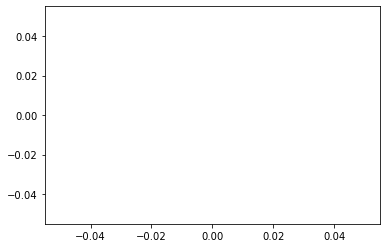

In [199]:
for i in tqdm(np.arange(Nt)):
    q = upwind_diff(H2[:,i]) * (H2[1:,i] + H2[0:-1,i])/2
    
    dqdx = upwind_diff(q)
    
    H2[1:-1,i] = H2[1:-1,i] + dt*(a + dqdx)
    H2[0,i] = H2[1,i]
    H2[-1,i] = Hend

#     H[1:-1] = H[1:-1] + dt*(a + 0.5* (H[0:-2]**2 - 2*H[1:-1]**2 + H[2:]**2)/dx**2)
    
#     H[0] = H[1]
#     H[-1] = Hend
    
    
    
    #if np.remainder(i,10)==0:
    #    xr.dataarray(
    
    
    
    #print(f'are H and H2 close? {np.allclose(H,H2)}')

    
    # fig, ax = plt.subplots()
    # ax.plot(x, H2-H)
    # #ax.plot(x[1:-1], dt*(a + dqdx))
    # plt.show()
    # time.sleep(0.1)
    # break
print(H2)
fig, ax = plt.subplots()
ax.plot(x, H2[:,-1])
plt.show()   
#print(f'are H and H2 close? {np.allclose(H,H2)}')

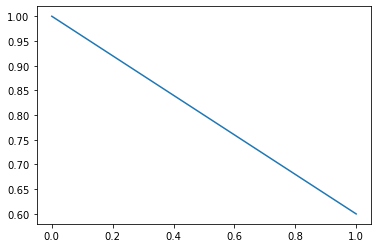

are H and H2 close? False


In [195]:
fig, ax = plt.subplots()
ax.plot(x, H)
plt.show()   
print(f'are H and H2 close? {np.allclose(H,H2)}')


In [21]:
type(N)

int